In [19]:
import ifcopenshell as _ifc
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

course_path = os.path.join(project_root, 'Course')
if course_path not in sys.path:
    sys.path.append(course_path)

from _general import mguu_cource_tools

In [7]:
example_file_path = os.path.join(project_root, 'DataExamples', 'Renga_House.ifc')
ifc_file = _ifc.open((example_file_path))
ifc_file

In [8]:
def get_objects_data():
    out_data_table = list()
    out_data_table.append(["Name", "IfcClass", "Level_name", "Net Volume", "Count", "GlobalId"])
    ifc_classes_volume = ["IfcWall", "IfcColumn", "IfcBeam", "IfcSlab"]
    #ifc_classes_count = ["IfcWindow", "IfcDoor"]
    ifc_classes_permitted = ["IfcWall", "IfcColumn", "IfcBeam", "IfcSlab", "IfcWindow", "IfcDoor"]
    ifc_storeys = ifc_file.by_type("IfcBuildingStorey")
    for ifc_storey in ifc_storeys:
        storey_name = ifc_storey.Name
        ifc_entities = ifc_storey.ContainsElements[0].RelatedElements
        for ifc_entity in ifc_entities:
            if ifc_entity.is_a() in ifc_classes_permitted:
                volume_prop = 0.0
                count_prop = 1
                if ifc_entity.is_a() in ifc_classes_volume:
                    volume_prop = mguu_cource_tools.get_object_properties(ifc_entity)["NetVolume"]
                else:
                    volume_prop = -1
                out_data_table.append([
                    ifc_entity.Name,
                    ifc_entity.is_a(),
                    storey_name,
                    str(volume_prop),
                    str(count_prop),
                    ifc_entity.GlobalId])
    return out_data_table

objects_data = get_objects_data()

In [9]:
def get_storeys_data():
    st_data = list()
    ifc_storeys = ifc_file.by_type("IfcBuildingStorey")
    for ifc_storey in ifc_storeys:
        st_data.append([ifc_storey.Name, ifc_storey.GlobalId, ifc_storey.Elevation])
    return st_data

def write_to_file(save_name_file, table_to_record):
    save_path = os.path.join(os.getcwd(), save_name_file + ".txt")
    save_path = os.path.abspath(os.path.realpath(save_path))
    with open (save_path, "w", encoding = "utf8") as _file:
        for table_row in table_to_record:
            temp_table_row_string = '|'.join(str(row_element) for row_element in table_row)
            _file.write(temp_table_row_string + "\n")

In [10]:
#Наши действия
objects_data = get_objects_data()
write_to_file("objects_3d", objects_data)

storeys_data = get_storeys_data()
write_to_file("storeys", storeys_data)

In [11]:
text_table_path = os.path.join(os.getcwd(), "objects_3d.txt")

In [12]:
#Работа с табличными даными в pandas
pd_dataframe = pd.read_table(text_table_path, sep = '|', encoding="utf8", header = 0)

pd_dataframe

,Name,IfcClass,Level_name,Net Volume,Count,GlobalId
0,Стена: 400.00 мм,IfcWall,1-й этаж,9.570,1,3IDEgWZseeg$RnwFUDd9bo
1,Стена: 400.00 мм,IfcWall,1-й этаж,3.780,1,3Z3kcQ$4gLFMDFNRHK4rHF
2,Стена: 400.00 мм,IfcWall,1-й этаж,5.310,1,12h8KLGB5HioZf4WZQVs8e
3,Стена: 400.00 мм,IfcWall,1-й этаж,4.758,1,2KRPdswmgZJVh1_wiUGY8H
4,Стена: 400.00 мм,IfcWall,1-й этаж,3.249,1,1RFMMEybu4SEFNDBix6uAG
...,...,...,...,...,...,...
99,Перекрытие: 300.00 мм,IfcSlab,2-й этаж,15.114,1,3PWl4NR14uaCqyULggIFXx
100,Перекрытие: 300.00 мм,IfcSlab,2-й этаж,2.268,1,2x1RXOgzsuxO9bZLKRyyxg
101,Перекрытие: 200.00 мм,IfcSlab,2-й этаж,0.780,1,19KMKXP9WfvlaEg_S14LJG
102,Перекрытие: 300.00 мм,IfcSlab,2-й этаж,4.968,1,1n9BJAsDMke9gvUpRTqkkv


In [13]:
#Получение датафрейма только для объемных элементов без графы count
df_without_count_column = pd_dataframe.drop("Count", axis = 1)
df_objects_volume = df_without_count_column[df_without_count_column["Net Volume"] > 0]

df_objects_volume

,Name,IfcClass,Level_name,Net Volume,GlobalId
0,Стена: 400.00 мм,IfcWall,1-й этаж,9.570,3IDEgWZseeg$RnwFUDd9bo
1,Стена: 400.00 мм,IfcWall,1-й этаж,3.780,3Z3kcQ$4gLFMDFNRHK4rHF
2,Стена: 400.00 мм,IfcWall,1-й этаж,5.310,12h8KLGB5HioZf4WZQVs8e
3,Стена: 400.00 мм,IfcWall,1-й этаж,4.758,2KRPdswmgZJVh1_wiUGY8H
4,Стена: 400.00 мм,IfcWall,1-й этаж,3.249,1RFMMEybu4SEFNDBix6uAG
...,...,...,...,...,...
99,Перекрытие: 300.00 мм,IfcSlab,2-й этаж,15.114,3PWl4NR14uaCqyULggIFXx
100,Перекрытие: 300.00 мм,IfcSlab,2-й этаж,2.268,2x1RXOgzsuxO9bZLKRyyxg
101,Перекрытие: 200.00 мм,IfcSlab,2-й этаж,0.780,19KMKXP9WfvlaEg_S14LJG
102,Перекрытие: 300.00 мм,IfcSlab,2-й этаж,4.968,1n9BJAsDMke9gvUpRTqkkv


In [14]:
#Получение датафрейма только для объемных элементов без графы count
df_without_volume_column = pd_dataframe.drop("Net Volume", axis = 1)
df_objects_count = df_without_volume_column[df_without_count_column["Net Volume"] < 0]

df_objects_count

,Name,IfcClass,Level_name,Count,GlobalId
24,Дверь - Однопольная подъемная: 3 000.00 мм x 2...,IfcDoor,1-й этаж,1,03QuTbwjLzKH8Wm8VHiyjq
25,Дверь - Однопольная распашная наружняя: 1 000....,IfcDoor,1-й этаж,1,27zBwO19DfEN$HBf6$eB1B
26,Дверь - Трехпольная распашная (глухое): 2 200....,IfcDoor,1-й этаж,1,3oFQuMhviddqtEwSe5hJUs
27,Дверь - Однопольная распашная c фрамугой (осте...,IfcDoor,1-й этаж,1,1LmrEbbv8ifY$BkDw4X3_h
28,Дверь - Однопольная распашная наружняя: 1 000....,IfcDoor,1-й этаж,1,2ZQkpYJZvkWOyGrrlZjqT4
29,Дверь - Однопольная распашная (глухое): 870.00...,IfcDoor,1-й этаж,1,3Ie6XJsDhcAsOjz9_Y$XL5
30,Дверь - Однопольная распашная (глухое): 870.00...,IfcDoor,1-й этаж,1,2bSjltdO6xbHOulFtSyHBZ
31,Дверь - Однопольная распашная (глухое): 870.00...,IfcDoor,1-й этаж,1,3xicpINsg9WjmWxyQPt8T2
32,Дверь - Однопольная распашная (глухое): 870.00...,IfcDoor,1-й этаж,1,0tUzvlV3Ysejy_YzhTnPyI
33,Дверь - Однопольная распашная (глухое): 970.00...,IfcDoor,1-й этаж,1,1fsKQ1FCB7428_0oa03S4a


In [15]:
#Получение суммарного объема для Ifc классов по уровням
df_summa_volume_by_storey = pd.pivot_table(df_objects_volume, index = "Level_name", columns = "IfcClass",
                                           values = "Net Volume", aggfunc=np.sum, fill_value=0)

df_summa_volume_by_storey

IfcClass,IfcColumn,IfcSlab,IfcWall
Level_name,,,
1-й этаж,0.576457,71.052739,70.5055
2-й этаж,0.000000,37.960000,82.4582


In [16]:
#Получение суммарного количества классов по уровням
df_summa_count_by_storey = pd.pivot_table(pd_dataframe, index="IfcClass", columns = "Level_name",
                                          values="Count", aggfunc=np.sum, fill_value=0).fillna(0)

df_summa_count_by_storey

Level_name,1-й этаж,2-й этаж
IfcClass,,
IfcColumn,5,0
IfcDoor,11,8
IfcSlab,6,7
IfcWall,24,24
IfcWindow,13,6


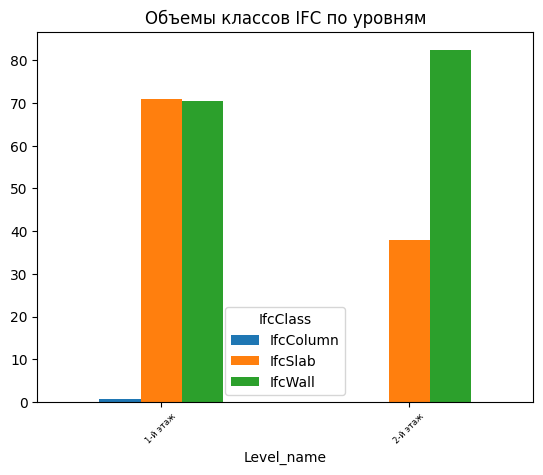

In [17]:
df_summa_volume_by_storey.plot(kind="bar", style = "k--", title = "Объемы классов IFC по уровням")
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

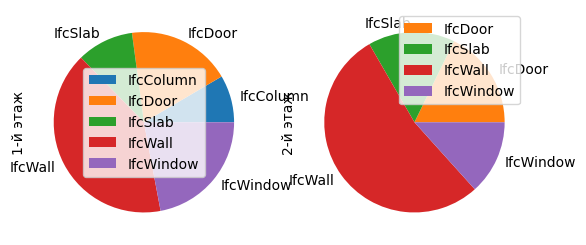

In [18]:
df_summa_count_by_storey.plot(kind = "pie", subplots = True)
plt.show()